[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM.git/master?filepath=PySDM_examples/Shipway_and_Hill_2012/demo.ipynb)    
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM/blob/master/PySDM_examples/Shipway_and_Hill_2012/demo.ipynb)

#### based on Fig. 1 from Shipway & Hill 2012 (Q. J. Royal Meteo. Soc. 138)  "_Diagnosis of systematic differences between multiple parametrizations of warm rain microphysics using a kinematic framework_"   
https://doi.org/10.1002/qj.1913

**WARNING: TODO #414 - particles are not advected by the flow yet (only sedimentation causes displacement)**

In [7]:
"""
clone and install PySDM dependencies in Colab
"""
import os, sys
if 'google.colab' in sys.modules:
    %cd /content
    if not os.path.isdir('PySDM'):
        !git clone --depth 1 https://github.com/atmos-cloud-sim-uj/PySDM.git
        %cd PySDM
    else:
        %cd PySDM
        !git pull
    !pip --quiet install --requirement requirements.txt
    !ldconfig

In [2]:
import os, sys
if 'google.colab' in sys.modules:
    %cd /content/PySDM
else:
    sys.path.insert(0, os.path.join(os.getcwd(), '../..'))

In [ ]:
from PySDM_examples.Shipway_and_Hill_2012 import Settings, Simulation, plot
from PySDM.physics import si

In [4]:
n_sd_per_gridbox = 256
dt = 25*si.s
dz = 100*si.m

output = {}
for w in (2*si.m/si.s, 3*si.m/si.s):
    for precip in (False, True):
        key = f"w={w}_p={precip}"
        output[key] = Simulation(Settings(n_sd_per_gridbox, w_1=w, dt=dt, dz=dz, precip=precip)).run()

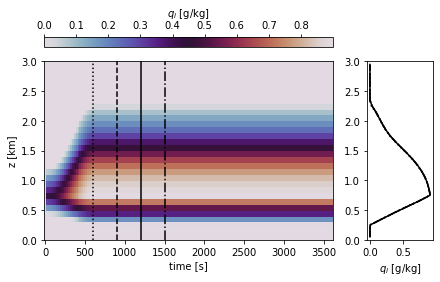

HTML(value="<a href='../utils/temporary_files/ql_w=2_p=False.pdf' target='_blank'>../utils/temporary_files/ql_…

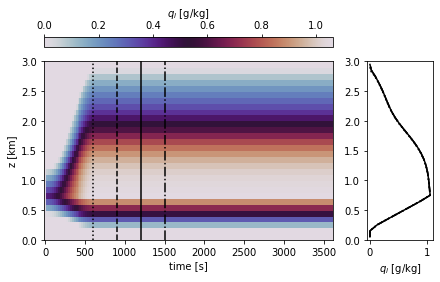

HTML(value="<a href='../utils/temporary_files/ql_w=3_p=False.pdf' target='_blank'>../utils/temporary_files/ql_…

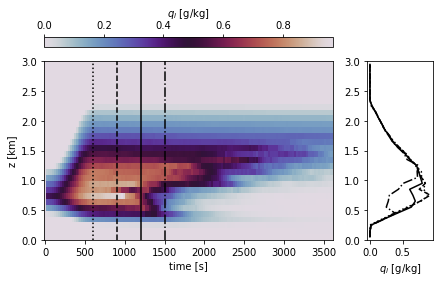

HTML(value="<a href='../utils/temporary_files/ql_w=2_p=True.pdf' target='_blank'>../utils/temporary_files/ql_w…

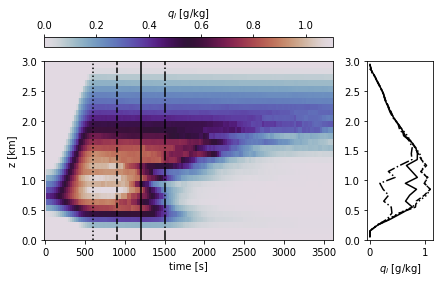

HTML(value="<a href='../utils/temporary_files/ql_w=3_p=True.pdf' target='_blank'>../utils/temporary_files/ql_w…

In [5]:
for p in (False, True):
    for w in (2, 3):
        plot(var='ql', qlabel='$q_l$ [g/kg]', fname=f'ql_w={w}_p={p}.pdf', output=output[f'w={w}.0_p={p}'])

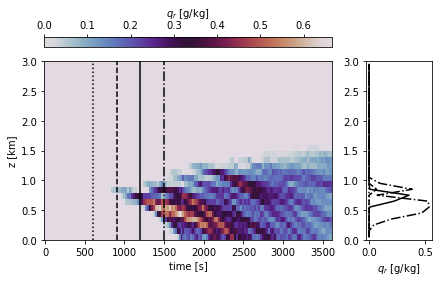

HTML(value="<a href='../utils/temporary_files/qr_w=2_p=True.pdf' target='_blank'>../utils/temporary_files/qr_w…

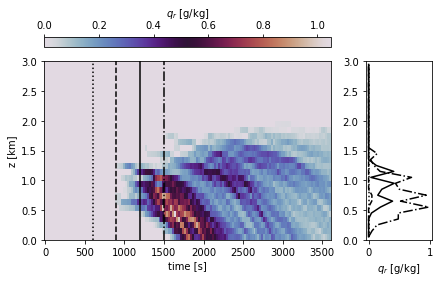

HTML(value="<a href='../utils/temporary_files/qr_w=3_p=True.pdf' target='_blank'>../utils/temporary_files/qr_w…

In [6]:
p=True
for w in (2, 3):
    plot(var='qr', qlabel='$q_r$ [g/kg]', fname=f'qr_w={w}_p={p}.pdf', output=output[f'w={w}.0_p={p}'])